In [1]:
!git clone https://github.com/alsombra/Mask_RCNN-TF2  # updated repository

Cloning into 'Mask_RCNN-TF2'...
remote: Enumerating objects: 1004, done.
remote: Total 1004 (delta 0), reused 0 (delta 0), pack-reused 1004
Receiving objects: 100% (1004/1004), 137.72 MiB | 17.68 MiB/s, done.
Resolving deltas: 100% (588/588), done.


In [2]:
%cd Mask_RCNN-TF2

/content/Mask_RCNN-TF2


In [3]:
pwd

'/content/Mask_RCNN-TF2'

In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.1/298.1 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 11.6 MB/s eta 0:00:00


In [5]:
!python setup.py install

/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        By 2023-Sep-26, you need to update your project and remove deprecated calls
        or your builds will no longer be supported.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separa

In [6]:
%cd ..

/content


In [7]:
pwd

'/content'

In [8]:
import os
import sys
import cv2
import numpy as np
import skimage.io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [9]:
import tensorflow as tf

In [10]:
tf.__version__

'2.12.0'

In [11]:
ROOT_DIR = os.path.abspath('./Mask_RCNN-TF2')
ROOT_DIR

'/content/Mask_RCNN-TF2'

In [12]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']

In [13]:
sys.path.append(ROOT_DIR)

In [14]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2']

In [15]:
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

In [16]:
# https://cocodataset.org/#home
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))

In [17]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2',
 '/',
 '/content/Mask_RCNN-TF2/samples/coco/']

In [18]:
import coco

In [19]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')

In [20]:
MODEL_DIR, IMAGE_DIR

('/content/Mask_RCNN-TF2/logs', '/content/Mask_RCNN-TF2/images')

In [21]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [22]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'mask_rcnn_coco.h5')

In [23]:
utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [24]:
class InferenceConfig(coco.CocoConfig):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

In [25]:
config = InferenceConfig()

In [26]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [27]:
MODEL_DIR

'/content/Mask_RCNN-TF2/logs'

In [28]:
network = modellib.MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=config)

Instructions for updating:
Use fn_output_signature instead


In [29]:
network.load_weights(COCO_MODEL_PATH, by_name=True)

In [30]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [31]:
len(class_names)

81

In [32]:
class_names[1], class_names.index('person')

('person', 1)

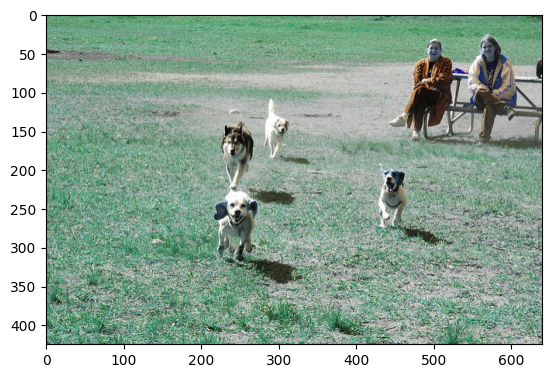

In [33]:
image2 = cv2.imread('/content/Mask_RCNN-TF2/images/2516944023_d00345997d_z.jpg')
plt.imshow(image2); # BGR

In [34]:
image = skimage.io.imread('/content/Mask_RCNN-TF2/images/2516944023_d00345997d_z.jpg') # RGB

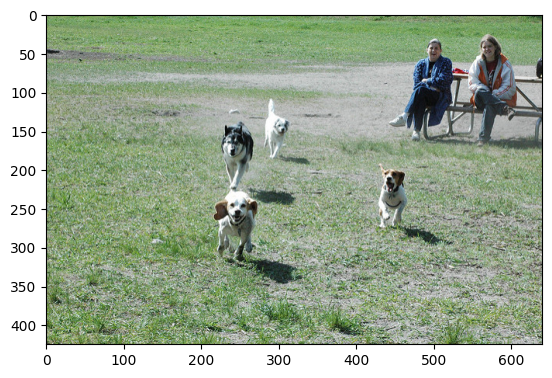

In [35]:
plt.imshow(image);

In [36]:
class_names[17], class_names[1], class_names[14]

('dog', 'person', 'bench')

In [37]:
results = network.detect([image], verbose=0)
results

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[{'rois': array([[195, 426, 277, 467],
         [226, 216, 321, 273],
         [106, 280, 189, 314],
         [ 32, 445, 159, 527],
         [136, 225, 231, 268],
         [ 27, 541, 168, 607],
         [ 75, 476, 164, 634]], dtype=int32),
  'class_ids': array([17, 17, 17,  1, 17,  1, 14], dtype=int32),
  'scores': array([0.9997004 , 0.9996582 , 0.9996049 , 0.99913245, 0.99799263,
         0.997436  , 0.9165011 ], dtype=float32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
       

In [38]:
r = results[0]

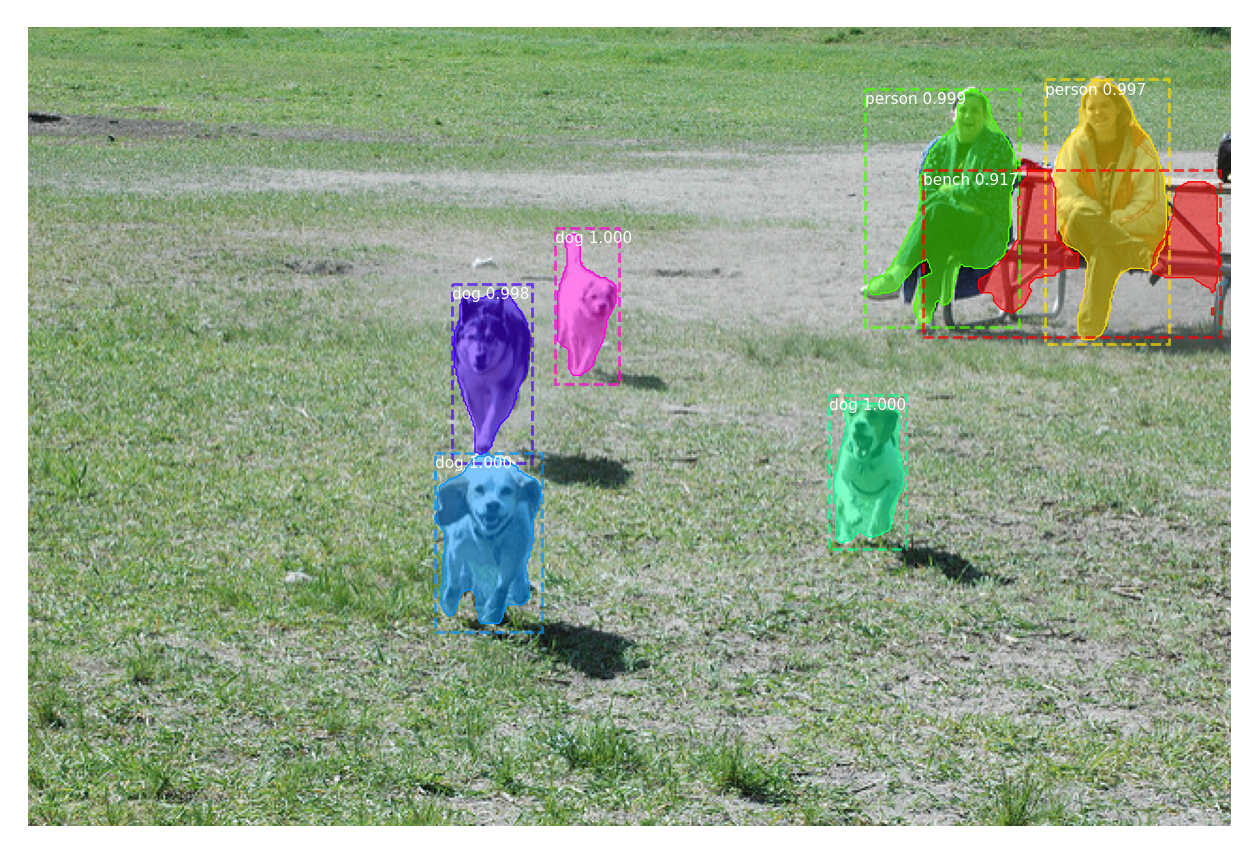

In [39]:
visualize.display_instances(image, r['rois'], r['masks'],
                            r['class_ids'], class_names, r['scores'])

In [40]:
np.unique(r['masks'], return_counts=True)

(array([False,  True]), array([1881592,   22408]))

In [41]:
r['masks']

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [42]:
def segment(image, r, index):
  mask = r['masks'][:,:,index]
  #print(mask)
  #print(mask.shape)

  mask = np.stack((mask,) * 3, axis = -1)
  #print(mask)
  #print(mask.shape)

  mask = mask.astype('uint8')
  #print(mask)
  bg = 255 - mask * 255
  #print(mask, mask.min(), mask.max())

  mask_show = np.invert(bg)
  #print(mask_show)
  mask_img = image * mask
  #print(mask_img)

  result = mask_img + bg
  return result, mask_show

In [43]:
image.shape, 425 * 640

((425, 640, 3), 272000)

In [44]:
segmentation, mask_obj = segment(image, r, 0)

In [45]:
segmentation

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [46]:
mask_obj

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [47]:
def show_segment(image, r, index, show_mask = False):
  segmentation, mask_obj = segment(image, r, index)
  plt.subplots(1, figsize=(16,16))
  plt.axis('off')
  if show_mask == True:
    plt.imshow(np.concatenate([mask_obj, segmentation], axis = 1))
  else:
    plt.imshow(np.concatenate([image, segmentation], axis = 1))

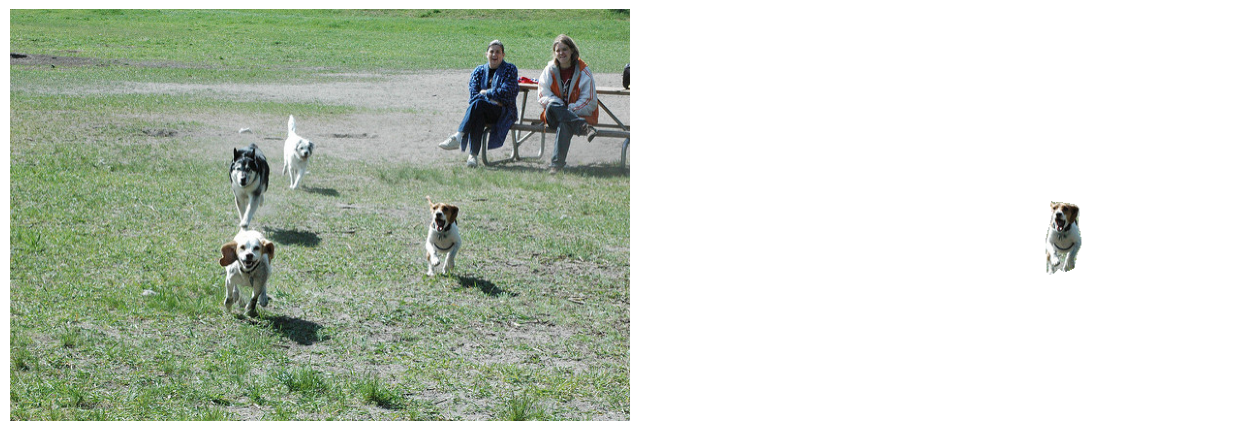

In [48]:
show_segment(image, r, 0, False)

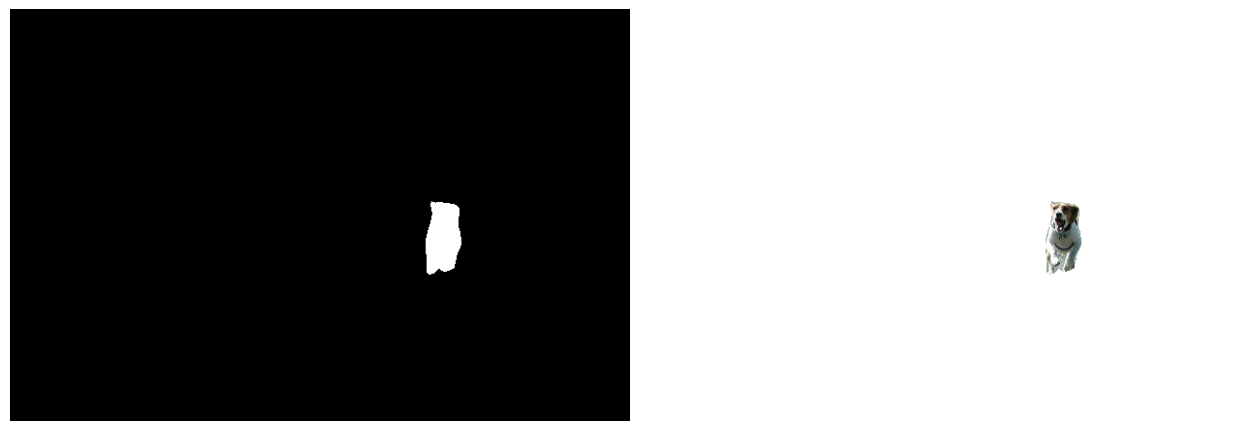

In [49]:
show_segment(image, r, 0, True)

In [50]:
r['rois'], len(r['rois'])

(array([[195, 426, 277, 467],
        [226, 216, 321, 273],
        [106, 280, 189, 314],
        [ 32, 445, 159, 527],
        [136, 225, 231, 268],
        [ 27, 541, 168, 607],
        [ 75, 476, 164, 634]], dtype=int32),
 7)

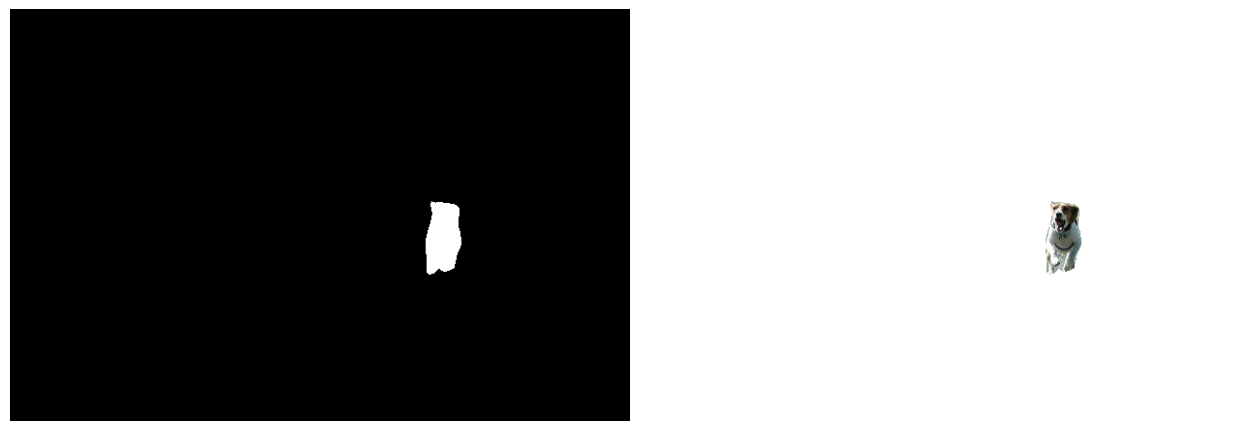

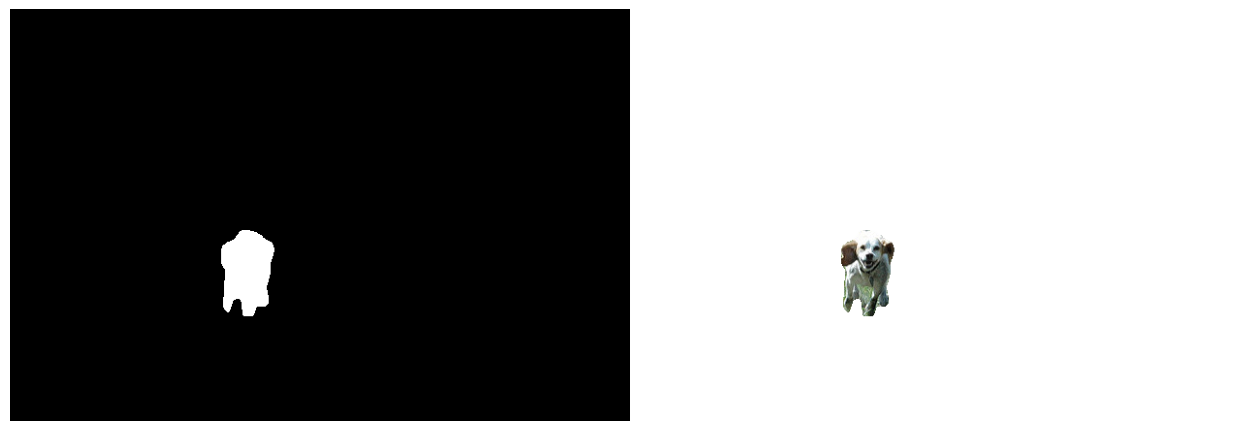

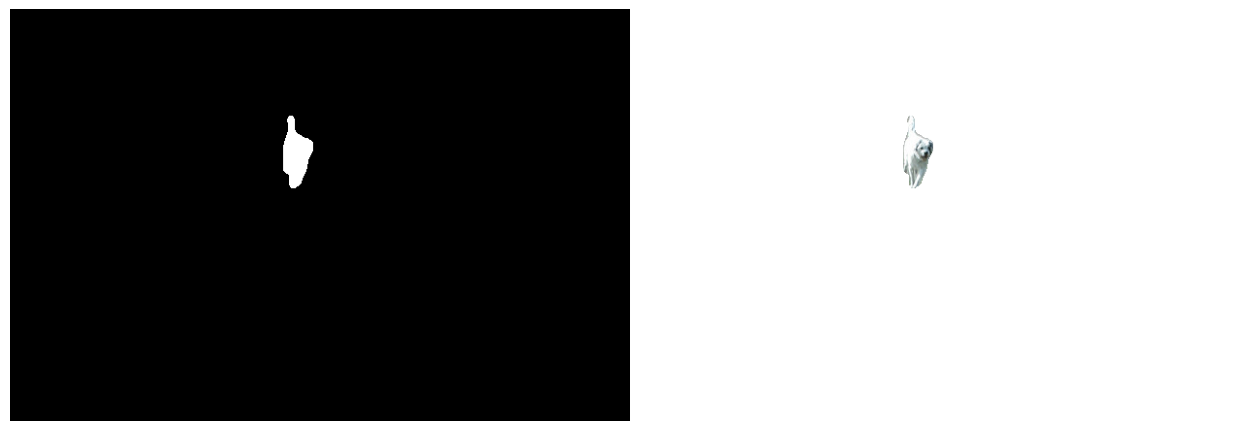

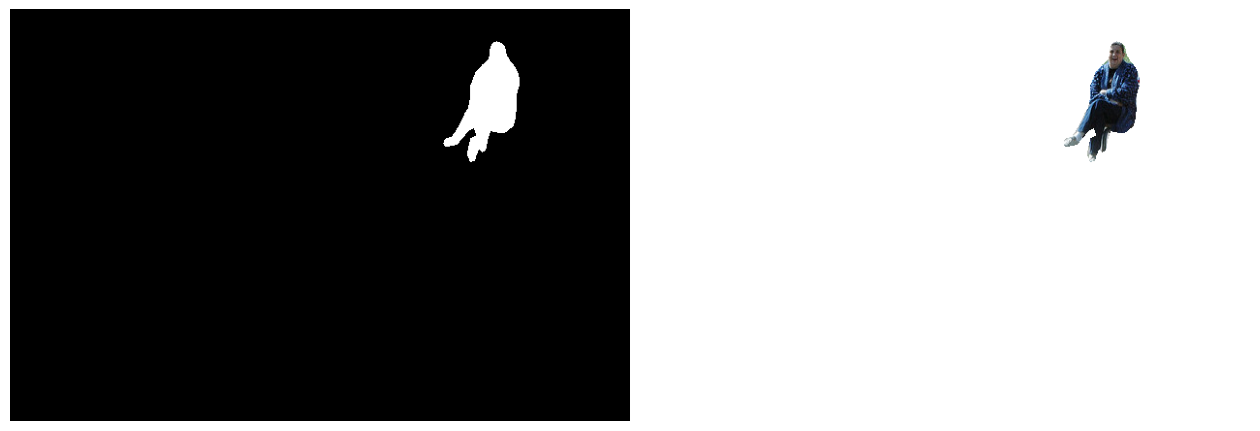

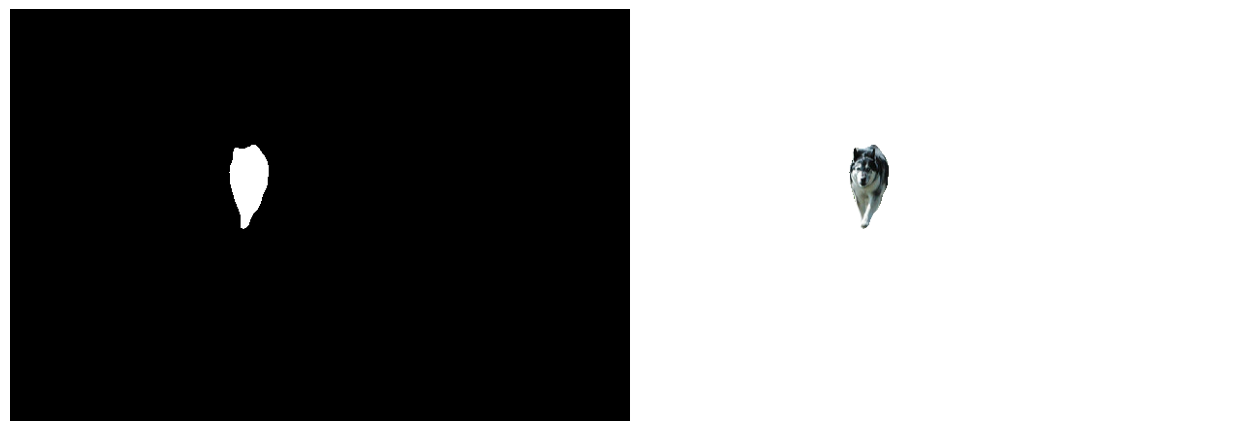

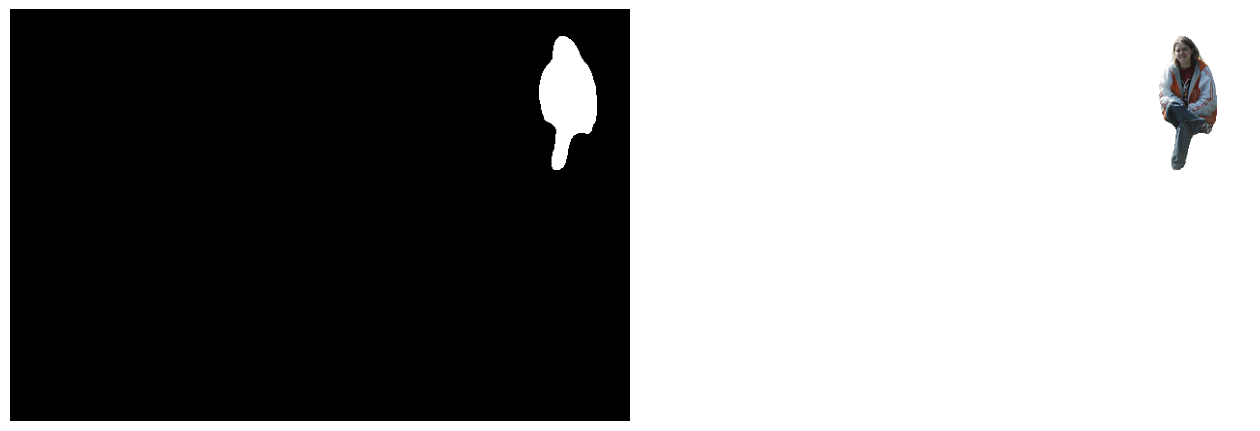

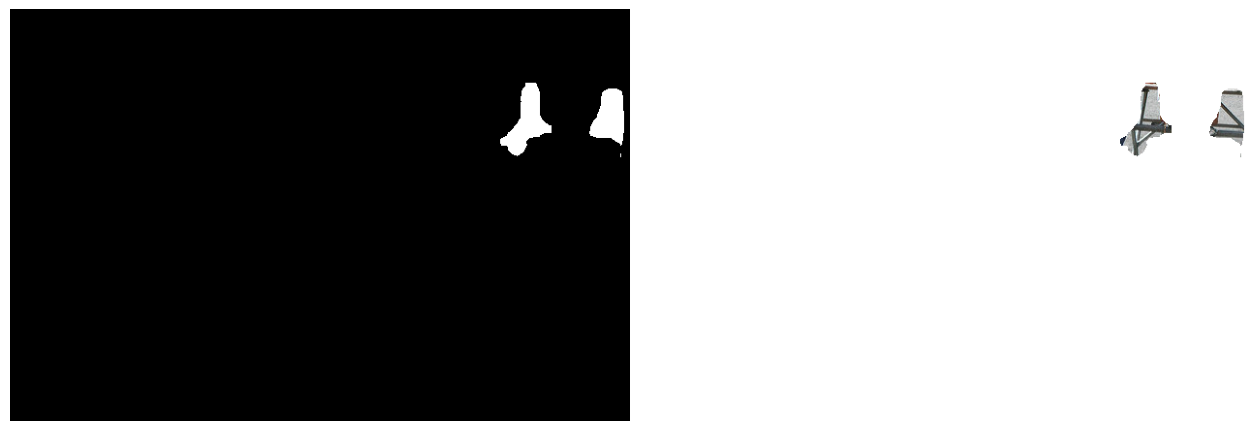

In [51]:
for index in range(len(r['rois'])):
  show_segment(image, r, index, True)

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
capture = cv2.VideoCapture('/content/drive/MyDrive/video_street2.mp4')
connected, frame = capture.read()
connected

True

In [56]:
frame.shape

(720, 1280, 3)

In [58]:
save_video = cv2.VideoWriter('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Videos/video_street2_result_seg.avi',
                             cv2.VideoWriter_fourcc(*'XVID'), 24, (frame.shape[1], frame.shape[0]))

In [61]:
!cp /content/drive/MyDrive/video_functions.py ./Mask_RCNN-TF2/mrcnn

In [62]:
from mrcnn import video_functions

In [63]:
colors = video_functions.random_colors(len(class_names), 55)
len(colors)

81

In [64]:
print(colors)

[(0.518518518518519, 0.0, 1.0), (1.0, 0.0, 0.14814814814814792), (0.37037037037037046, 1.0, 0.0), (0.0, 1.0, 0.5185185185185182), (1.0, 0.0, 0.5925925925925926), (1.0, 0.0, 0.518518518518519), (1.0, 0.0, 0.7407407407407405), (1.0, 0.5925925925925926, 0.0), (0.0, 1.0, 0.2962962962962963), (0.0, 1.0, 0.7407407407407405), (0.6666666666666667, 1.0, 0.0), (1.0, 0.07407407407407407, 0.0), (0.5925925925925926, 0.0, 1.0), (0.0, 0.5185185185185182, 1.0), (0.0, 1.0, 0.4444444444444442), (0.8888888888888884, 0.0, 1.0), (0.8888888888888888, 1.0, 0.0), (0.0, 0.8888888888888893, 1.0), (1.0, 0.2962962962962963, 0.0), (0.0, 0.2962962962962967, 1.0), (0.0740740740740744, 0.0, 1.0), (0.9629629629629628, 0.0, 1.0), (0.22222222222222232, 0.0, 1.0), (0.7407407407407409, 1.0, 0.0), (1.0, 0.6666666666666666, 0.0), (0.0, 1.0, 0.22222222222222232), (0.0, 1.0, 0.07407407407407396), (0.0, 1.0, 0.5925925925925926), (0.0, 0.44444444444444464, 1.0), (0.0, 0.8148148148148149, 1.0), (1.0, 0.5185185185185185, 0.0), (0

In [65]:
def show(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(img)
  plt.show()

In [66]:
frame_show = 20
current_frame = 0

In [68]:
images = [os.path.join('/content/Mask_RCNN-TF2/images', f) for f in os.listdir('/content/Mask_RCNN-TF2/images')]
images

['/content/Mask_RCNN-TF2/images/3651581213_f81963d1dd_z.jpg',
 '/content/Mask_RCNN-TF2/images/3132016470_c27baa00e8_z.jpg',
 '/content/Mask_RCNN-TF2/images/25691390_f9944f61b5_z.jpg',
 '/content/Mask_RCNN-TF2/images/8829708882_48f263491e_z.jpg',
 '/content/Mask_RCNN-TF2/images/3800883468_12af3c0b50_z.jpg',
 '/content/Mask_RCNN-TF2/images/1045023827_4ec3e8ba5c_z.jpg',
 '/content/Mask_RCNN-TF2/images/4410436637_7b0ca36ee7_z.jpg',
 '/content/Mask_RCNN-TF2/images/8433365521_9252889f9a_z.jpg',
 '/content/Mask_RCNN-TF2/images/3627527276_6fe8cd9bfe_z.jpg',
 '/content/Mask_RCNN-TF2/images/7581246086_cf7bbb7255_z.jpg',
 '/content/Mask_RCNN-TF2/images/7933423348_c30bd9bd4e_z.jpg',
 '/content/Mask_RCNN-TF2/images/3862500489_6fd195d183_z.jpg',
 '/content/Mask_RCNN-TF2/images/8239308689_efa6c11b08_z.jpg',
 '/content/Mask_RCNN-TF2/images/8734543718_37f6b8bd45_z.jpg',
 '/content/Mask_RCNN-TF2/images/8053677163_d4c8f416be_z.jpg',
 '/content/Mask_RCNN-TF2/images/2502287818_41e4b0c4fb_z.jpg',
 '/content